In [2]:
pip install scipy==1.2

     |████████████████████████████████| 26.6MB 1.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


summary()
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 09 Jun 2019   Prob (F-statistic):           3.83e-62
Time:                        08:50:33   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.0

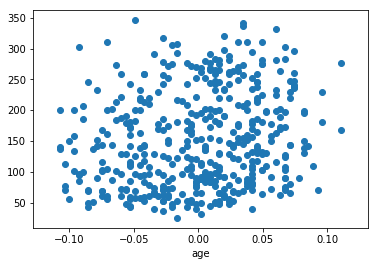

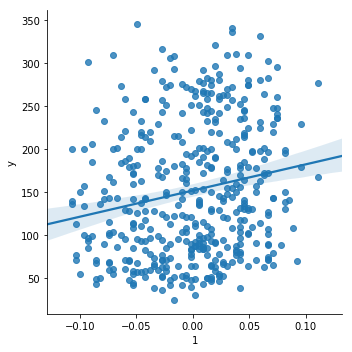

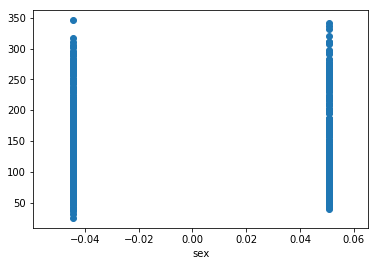

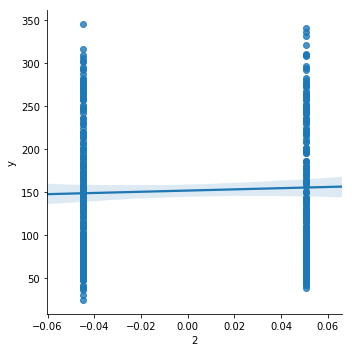

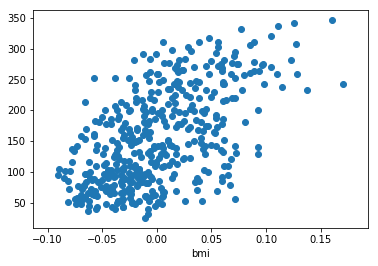

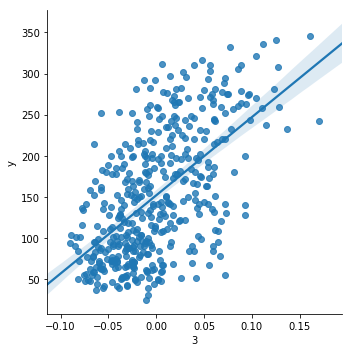

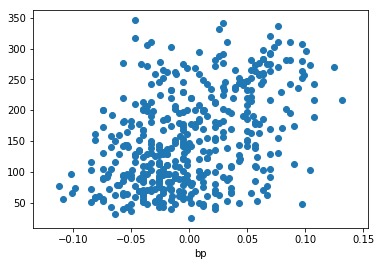

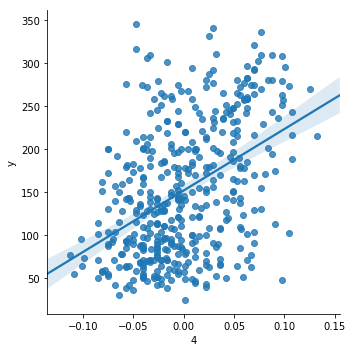

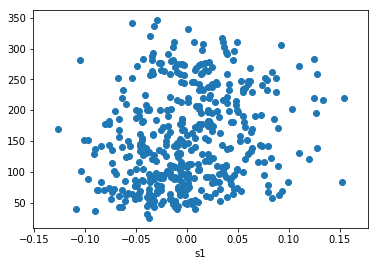

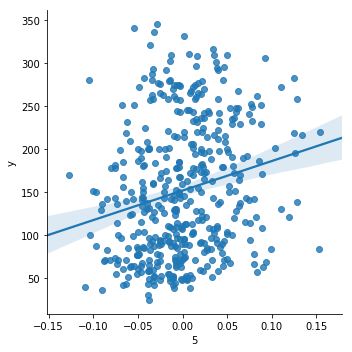

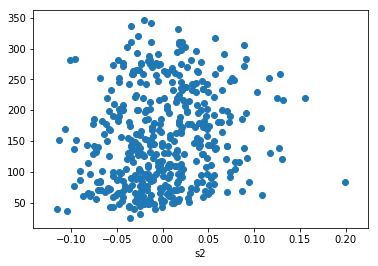

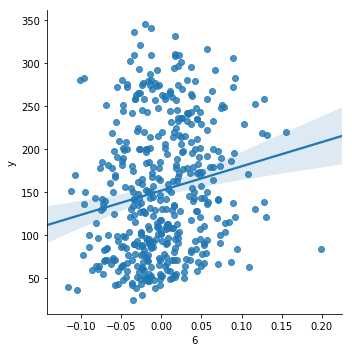

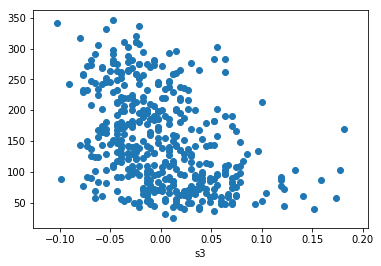

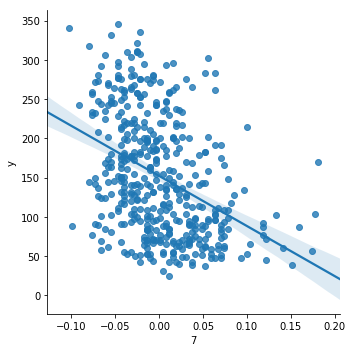

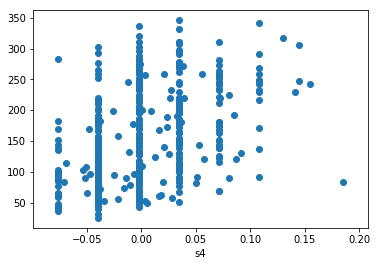

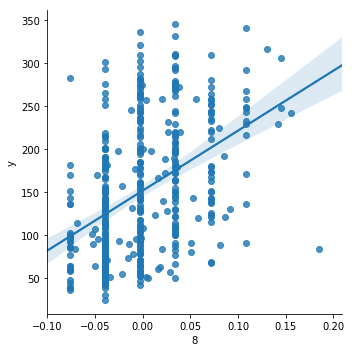

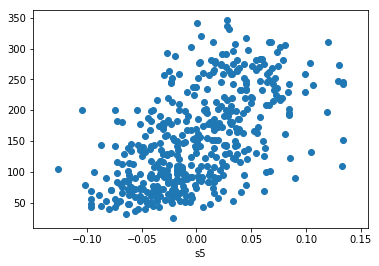

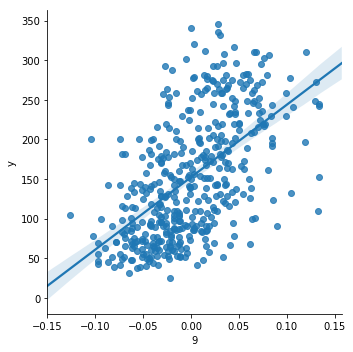

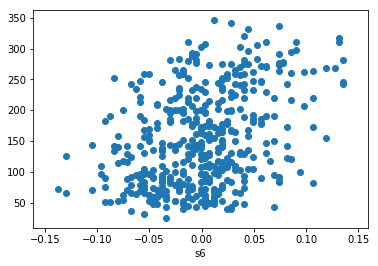

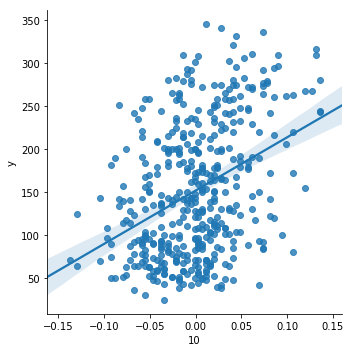

    Coefficients  Standard Errors  t values  Probabilites
0       152.1335            2.576    59.061         0.000
1       -10.0122           59.749    -0.168         0.867
2      -239.8191           61.222    -3.917         0.000
3       519.8398           66.534     7.813         0.000
4       324.3904           65.422     4.958         0.000
5      -792.1842          416.684    -1.901         0.058
6       476.7458          339.035     1.406         0.160
7       101.0446          212.533     0.475         0.635
8       177.0642          161.476     1.097         0.273
9       751.2793          171.902     4.370         0.000
10       67.6254           65.984     1.025         0.306


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 19 15:32:25 2019

@author: Guru
"""
"""
Source : 
    https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression
    http://pythonplot.com/#scatter-with-regression
"""
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import summary_table
import seaborn as sns

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
st, data, ss2 = summary_table(est2, alpha=0.05)


print("summary()\n",est2.summary())
print("Intercept and Coefficients\n",est2.params)
print("Standard Errors\n",est2.bse)
print("tvalues\n",est2.tvalues)
print("pvalues\n",est2.pvalues)
print("rsquared\n",est2.rsquared)
print("rsquared_adj\n",est2.rsquared_adj)
est2.bse
for attr in dir(est2):
    if not attr.startswith('_'):
        print(attr)
predictions = est2.predict(X2)

print(est2.predict(X2[:3,:]))
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score",r2_score(y,predictions))
#slope, intercept, r_value, p_value, std_err = stats.linregress(X2[:,1],y)
#print(slope, intercept, r_value, p_value, std_err)
d1 = pd.DataFrame(X2)
d2 = pd.DataFrame(y)
d1['y'] = y
d1.columns = d1.columns.map(str)
# Plot all independent variables on plot to see check the linearity
for i in range(len(diabetes.feature_names)):
    plt.scatter(X[:,i],y)
    plt.xlabel(diabetes.feature_names[i])
    sns.lmplot(x=str(i+1), y='y', data=d1)
    plt.show()


"""
plt.scatter(X[:,1],y)
plt.show()
plt.scatter(X[:,2],y)
plt.show()
plt.scatter(X[:,3],y)
plt.show()
plt.scatter(X[:,4],y)
plt.show()
plt.scatter(X[:,5],y)
plt.show()
plt.scatter(X[:,5],y)
plt.show()
plt.scatter(X[:,5],y)
plt.show()
plt.scatter(X[:,5],y)
plt.show()
plt.scatter(X[:,5],y)
plt.show()
plt.scatter(X[:,5],y)
plt.show()"""



lm = LinearRegression()
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

#newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
newX = pd.DataFrame(X2)



####################################################
lm_ = LinearRegression()
lm_.fit(X[:,:4],y)
params_ = np.append(lm_.intercept_,lm_.coef_)
predictions_ = lm_.predict(X[:,:4])


x3 = X2[:,:5]
newX_ = pd.DataFrame(x3)
newX_ = newX_.round(2)
newX_ = newX_ * 100
MSE_ = (sum((y[:]-predictions_)**2))/(len(newX_)-len(newX_.columns))
var_b_ = MSE_*(np.linalg.inv(np.dot(newX_.T,newX_)).diagonal())
sd_b_ = np.sqrt(var_b_)
ts_b_ = params_/ sd_b_

p_values_ =[2*(1-stats.t.cdf(np.abs(i),(len(newX_)-1))) for i in ts_b_]

####################################################



MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))
# Standar Error, t-values, p-values, stats.t.cdf
var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

#Large values of t indicate that the null hypothesis can be rejected and 
#that the corresponding coefficient is not zero. The second column, p-value, 
#expresses the results of the hypothesis test as a significance level. 
#Conventionally, p-values smaller than 0.05 are taken as evidence that 
#the population coefficient is nonzero.